# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Radiation-Out-West" data-toc-modified-id="Radiation-Out-West-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Radiation Out West</a></div><div class="lev2 toc-item"><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></div><div class="lev2 toc-item"><a href="#Plot-1---Radiation-Measurements-for-Honolulu,-Hawaii--2010-2012-(Monthly-Averages)" data-toc-modified-id="Plot-1---Radiation-Measurements-for-Honolulu,-Hawaii--2010-2012-(Monthly-Averages)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot 1 - Radiation Measurements for Honolulu, Hawaii  2010-2012 (Monthly Averages)</a></div><div class="lev2 toc-item"><a href="#Plot-2---Radiation-Measurements-for-6-Western-Cities-2010-2012-(Yearly-Totals)" data-toc-modified-id="Plot-2---Radiation-Measurements-for-6-Western-Cities-2010-2012-(Yearly-Totals)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot 2 - Radiation Measurements for 6 Western Cities 2010-2012 (Yearly Totals)</a></div>

# Radiation Out West

 __Proposed Project for The Data Incubator - Eric Godat__

All data used in this notebook can be found here: __[US Environmental Protection Agency RadNet CSV Repository](https://www.epa.gov/radnet/radnet-csv-file-downloads)__

My proposed project is to use radiation monitoring data provided by the EPA to study how airborne radiation is distributed throughout the United States with the ultimate goal of providing a resource for citizens in case a nuclear event occurs.

To start, I looked at 6 West Coast cities (Honolulu, Anchorage, Juneau, Seattle, Los Angeles, and San Francisco) from 2010-2012. I chose these cities as they were the most likely candidates to feel the effects of fallout from the [Fukushima Daiichi nuclear disaster](https://en.wikipedia.org/wiki/Fukushima_Daiichi_nuclear_disaster) in Japan on March 11, 2011. In this brief window, however, I was not able to discern any spike in radiation levels due to the event. It is possible that my ~1.5 year window after the event was insufficient for the fallout to cross the Pacific Ocean or that the fallout simply will never make it all the way across. I would like to add more years to my analysis to study this further.

As I expand this project, I also hope to look at population centers near nuclear power plants, national laboratories such as [Los Alamos](https://en.wikipedia.org/wiki/Los_Alamos_National_Laboratory) and [Oakridge](https://en.wikipedia.org/wiki/Oak_Ridge_National_Laboratory) National Labs, and near [Three-Mile Island](https://en.wikipedia.org/wiki/Three_Mile_Island_accident).

Another interesting angle I would like to explore that is not addressed in this notebook would be to study any correlation between levels of radiation with rates of certain cancers ([thyroid cancer due to Iodine-131 inhalation for example](https://en.wikipedia.org/wiki/Nuclear_fallout#Local_fallout)). This analysis comes on a personal note as a friend of mine recently was diagnosed with thyroid cancer after having been in Japan during the Fukushima event and several family members of mine have died from similar cancers after working at Los Alamos, Oakridge and [Chernobyl](https://en.wikipedia.org/wiki/Chernobyl_disaster).


[Link to article](https://www.nytimes.com/2018/07/20/science/fukushima-radiation-levels-california-wine-nyt.html) about Fukushima fallout in Northern California wines.



## Setup

In [7]:
import numpy as np
import pandas as pd
import datetime
from matplotlib.pyplot import *
import matplotlib.patches as mpatches

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
#Initialized dictionary which will get populated by the cities of interest
cities={}

A function to help add cities to the _cities_ dictionary.

In [9]:
def addCity(state_cityname, dictionary, years=[2010,2011,2012]):
    city={}
    sets={}
    for year in years:
        string = state_cityname.upper()+"_"+str(year)+".csv"
        sets[str(year)]=string
    city["data"]=sets
    dictionary[state_cityname.upper()]=city
    return dictionary

In [10]:
addCity("HI_Honolulu",cities)
addCity("AK_ANCHORAGE",cities)
addCity("AK_JUNEAU",cities)
addCity("WA_SEATTLE",cities)
addCity("CA_SAN_FRANCISCO",cities)
addCity("CA_LOS_ANGELES",cities)

{'AK_ANCHORAGE': {'data': {'2010': 'AK_ANCHORAGE_2010.csv',
   '2011': 'AK_ANCHORAGE_2011.csv',
   '2012': 'AK_ANCHORAGE_2012.csv'}},
 'AK_JUNEAU': {'data': {'2010': 'AK_JUNEAU_2010.csv',
   '2011': 'AK_JUNEAU_2011.csv',
   '2012': 'AK_JUNEAU_2012.csv'}},
 'CA_LOS_ANGELES': {'data': {'2010': 'CA_LOS_ANGELES_2010.csv',
   '2011': 'CA_LOS_ANGELES_2011.csv',
   '2012': 'CA_LOS_ANGELES_2012.csv'}},
 'CA_SAN_FRANCISCO': {'data': {'2010': 'CA_SAN_FRANCISCO_2010.csv',
   '2011': 'CA_SAN_FRANCISCO_2011.csv',
   '2012': 'CA_SAN_FRANCISCO_2012.csv'}},
 'HI_HONOLULU': {'data': {'2010': 'HI_HONOLULU_2010.csv',
   '2011': 'HI_HONOLULU_2011.csv',
   '2012': 'HI_HONOLULU_2012.csv'}},
 'WA_SEATTLE': {'data': {'2010': 'WA_SEATTLE_2010.csv',
   '2011': 'WA_SEATTLE_2011.csv',
   '2012': 'WA_SEATTLE_2012.csv'}}}

A look at how the data is structured

In [11]:
data = pd.read_csv(cities["HI_HONOLULU"]["data"]["2010"])

In [12]:
data.columns

Index([u'MONITOR ID', u'LOCATION_NAME', u'SAMPLE COLLECTION TIME',
       u'DOSE EQUIVALENT RATE (nSv/h)', u'GAMMA COUNT RATE R02 (CPM)',
       u'GAMMA COUNT RATE R03 (CPM)', u'GAMMA COUNT RATE R04 (CPM)',
       u'GAMMA COUNT RATE R05 (CPM)', u'GAMMA COUNT RATE R06 (CPM)',
       u'GAMMA COUNT RATE R07 (CPM)', u'GAMMA COUNT RATE R08 (CPM)',
       u'GAMMA COUNT RATE R09 (CPM)', u'STATUS'],
      dtype='object')

A function to clean the data for easier use in the future.

In [13]:
def load_data_clean_date(city,year=(2010,2011,2012),dictionary=cities):
    #Read Multiple Years into Single DF
    concat_df = pd.DataFrame()
    for i in range(len(year)):
        tmp = pd.read_csv(dictionary[city]["data"][str(year[i])])
        concat_df = pd.concat([concat_df,tmp]).drop_duplicates()
    
    #Clean Date
    concat_df["SAMPLE COLLECTION TIME"] = pd.to_datetime(concat_df["SAMPLE COLLECTION TIME"])
    concat_df['DATE'] = concat_df["SAMPLE COLLECTION TIME"].apply( lambda concat_df : datetime.datetime(year=concat_df.year, month=concat_df.month, day=concat_df.day))
    concat_df.set_index(concat_df["DATE"],inplace=True)

    concat_df = concat_df.drop(['MONITOR ID',"DOSE EQUIVALENT RATE (nSv/h)"],axis=1)

    #Add SUM Column
    concat_df['GAMMA TOTAL'] = concat_df["GAMMA COUNT RATE R02 (CPM)"]+concat_df["GAMMA COUNT RATE R03 (CPM)"]+concat_df["GAMMA COUNT RATE R04 (CPM)"]+concat_df["GAMMA COUNT RATE R05 (CPM)"]+concat_df["GAMMA COUNT RATE R06 (CPM)"]+concat_df["GAMMA COUNT RATE R07 (CPM)"]+concat_df["GAMMA COUNT RATE R08 (CPM)"]+concat_df["GAMMA COUNT RATE R09 (CPM)"]
    
    return concat_df

## Plot 1 - Radiation Measurements for Honolulu, Hawaii  2010-2012 (Monthly Averages)

A function designed to plot the average amount of radiation measured in a single city for each month.

In [23]:
def plot_rad_by_month(data, save=False):
    
    data_by_month = data.resample("M").mean()
    colorlist = ("b","r","g","c","m","y","violet","darkgreen",'k')
    
    plt.figure()
    ax = data_by_month.plot(color=colorlist)
    ax.set_title("Honolulu, HI 2010-2012",fontsize=17) #Hard Coded to Honolulu for Demo
    ax.set_xlabel("Months",fontsize=17)
    ax.set_ylabel("Mean Counts per Month",fontsize=17)
       
    plt.ylim(0,3000)

    columns = [data.columns[i].replace("COUNT RATE ","").replace(" (CPM)","") for i in range(2,10)]
    columns.append("TOTAL")

    ax.legend(columns,bbox_to_anchor=(0., 0.88, 1., .102), loc=3,ncol=5, mode="expand", borderaxespad=0.,fontsize=8)
    plt.tight_layout()
    
    if save:
        print 'Exporting: '+"months.pdf"
        savefig("months.pdf")

In [24]:
data = load_data_clean_date("HI_HONOLULU")

Exporting: months.pdf


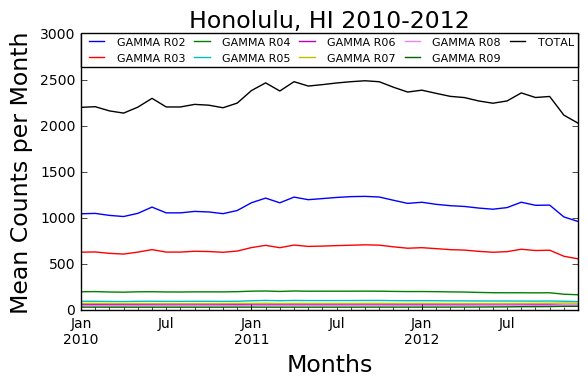

In [25]:
plot_rad_by_month(data,save=True)

## Plot 2 - Radiation Measurements for 6 Western Cities 2010-2012 (Yearly Totals)

A sample of the data for Juneau, Alaska.

In [18]:
test = load_data_clean_date("AK_JUNEAU")
test.sample(2)

,LOCATION_NAME,SAMPLE COLLECTION TIME,GAMMA COUNT RATE R02 (CPM),GAMMA COUNT RATE R03 (CPM),GAMMA COUNT RATE R04 (CPM),GAMMA COUNT RATE R05 (CPM),GAMMA COUNT RATE R06 (CPM),GAMMA COUNT RATE R07 (CPM),GAMMA COUNT RATE R08 (CPM),GAMMA COUNT RATE R09 (CPM),STATUS,DATE,GAMMA TOTAL
DATE,,,,,,,,,,,,,
2012-02-08,AK: JUNEAU,2012-02-08 01:42:00,1103.0,585.0,175.0,90.0,57.0,75.0,44.0,26.0,APPROVED,2012-02-08,2155.0
2012-12-15,AK: JUNEAU,2012-12-15 12:03:00,820.0,425.0,135.0,75.0,43.0,57.0,41.0,24.0,APPROVED,2012-12-15,1620.0


Function designed to plot the yearly totals for each of the 6 western US cities in this demonstration.

In [19]:
def plot_city_bars(citynamelist,datalist,save=False,years=(2010,2011,2012),colors=("b","y","r","c","g","m")):
    
    gamma_cat = pd.DataFrame()
    x_labels = []
    colorlist = []
    labels = []
    
    for i in range(len(citynamelist)):
        
        cityname=citynamelist[i]
        gamma = datalist[i]
    
        for el in years:
            x_labels.append(citynamelist[i])
               
        labels.append(years)
        
        for el in years:
            colorlist.append(colors[i])
        
        gamma_cat = pd.concat([gamma_cat,gamma]).drop_duplicates()
        
    labels = np.array(labels).flatten()
    
    gamma_cat = gamma_cat/1e6

    plt.figure(figsize=(12, 8))
    ax = gamma_cat.plot(kind='bar',color=colorlist)
    ax.set_title("")
    ax.set_xlabel("City by Year",fontsize=17)
    ax.set_ylabel("Total Count Rate ($10^6$CPM)",fontsize=17)
    ax.set_xticklabels("")
    #ax.set_xticklabels(x_labels) # This can be uncommented on for more explicit bar labels
    plt.grid(axis='both')
    rects = ax.patches
    
    plt.ylim(1,50)

    info_patch = [mpatches.Patch(color=colors[i],label=citynamelist[i]) for i in range(len(citynamelist))]
    ax.legend(handles=info_patch,loc='upper left')

    

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')
        
    if save:
        print 'Exporting: '+"cities_"+str(len(citynamelist))+"years_"+str(len(years))+".pdf"
        savefig("cities_"+str(len(citynamelist))+"years_"+str(len(years))+".pdf")

Loading data for all 6 cities using the helper function to clean the dates. Additionally the data is grouped by year and summed to give a total radiation measurement for a year at each location.

In [20]:
data_HIH=load_data_clean_date("HI_HONOLULU").resample("A").sum()["GAMMA TOTAL"]
data_AKA=load_data_clean_date("AK_ANCHORAGE").resample("A").sum()["GAMMA TOTAL"]
data_AKJ=load_data_clean_date("AK_JUNEAU").resample("A").sum()["GAMMA TOTAL"]
data_WAS=load_data_clean_date("WA_SEATTLE").resample("A").sum()["GAMMA TOTAL"]
data_CASF=load_data_clean_date("CA_SAN_FRANCISCO").resample("A").sum()["GAMMA TOTAL"]
data_CALA=load_data_clean_date("CA_LOS_ANGELES").resample("A").sum()["GAMMA TOTAL"]

Exporting: cities_6years_3.pdf


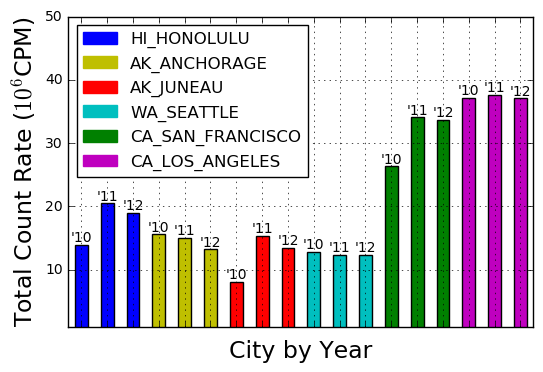

In [21]:
plot_city_bars(["HI_HONOLULU","AK_ANCHORAGE","AK_JUNEAU","WA_SEATTLE","CA_SAN_FRANCISCO","CA_LOS_ANGELES"],[data_HIH,data_AKA,data_AKJ,data_WAS,data_CASF,data_CALA],years=("'10","'11","'12"),save=True)

A sample plot for a single city using the same function as above.

DATE
2010-12-31     8091670.0
2011-12-31    15309185.0
2012-12-31    13417278.0
Freq: A-DEC, Name: GAMMA TOTAL, dtype: float64


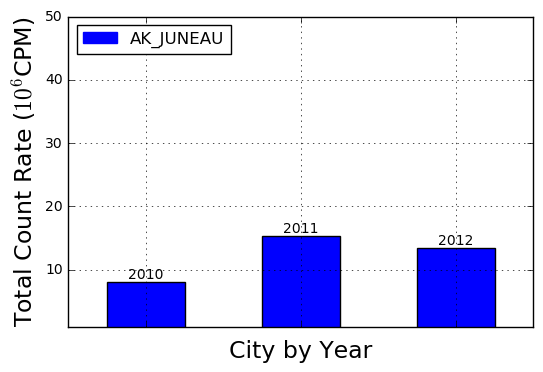

In [22]:
cityname="AK_JUNEAU"
data_single=load_data_clean_date(cityname).resample("A").sum()["GAMMA TOTAL"]
print data_single
plot_city_bars([cityname],[data_single])